In [84]:
"""Weather Analysis using data from Delhi Station

Jupyter Notebook

Author: Ashutosh
Email: ashutoshvashisht99@gmail.com
Github: vash-ashutosh
"""

'Weather Analysis using data from Delhi Station\n\nJupyter Notebook\n\nAuthor: Ashutosh\nEmail: ashutoshvashisht99@gmail.com\nGithub: vash-ashutosh\n'

In [85]:
#Getting Data
import requests
import pandas as pd
import json
import numpy as np
from datetime import datetime

In [86]:
Token='QqRTMTsyBdGWFXUItgTmPDPqZUbYlNBy'

In [87]:
#Palam Station station
station_id = 'GHCND:IN022023000'

In [88]:
#initialize lists to store data
dates_temp = []
dates_prcp = []
temps = []
prcp = []

#for each year from 2010-2020 ...
for year in range(2010, 2021):
    year = str(year)
    print('working on year '+year)
    
    #make the api call
    r = requests.get('https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&datatypeid=TAVG&limit=1000&stationid=GHCND:IN022023000&startdate='+year+'-01-01&enddate='+year+'-12-31', headers={'token':Token})
    #load the api response as a json
    d = json.loads(r.text)
    #get all items in the response which are average temperature readings
    avg_temps = [item for item in d['results'] if item['datatype']=='TAVG']
    #get the date field from all average temperature readings
    dates_temp += [item['date'] for item in avg_temps]
    #get the actual average temperature from all average temperature readings
    temps += [item['value'] for item in avg_temps]

working on year 2010
working on year 2011
working on year 2012
working on year 2013
working on year 2014
working on year 2015
working on year 2016
working on year 2017
working on year 2018
working on year 2019
working on year 2020


In [89]:
#initialize dataframe
data = pd.DataFrame()

#populate date and average temperature fields (cast string date to datetime and convert temperature from tenths of Celsius to Celsius)
data['date'] = [datetime.strptime(d, "%Y-%m-%dT%H:%M:%S") for d in dates_temp]
data['avgTemp'] = [float(v)/10 for v in temps]

In [90]:
#Data Summary
data.describe()

,avgTemp
count,4000.000000
mean,25.197000
std,7.515442
min,5.200000
25%,18.800000
50%,27.400000
75%,30.900000
max,40.400000


In [92]:
print(data.head())
import matplotlib.pyplot as plt

        date  avgTemp
0 2010-01-01     13.2
1 2010-01-02     10.4
2 2010-01-03     11.5
3 2010-01-04     10.6
4 2010-01-05     11.9


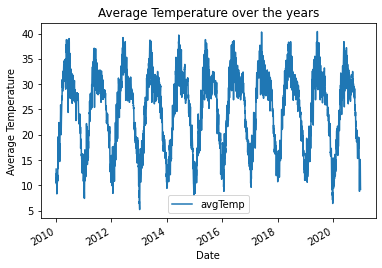

In [103]:
data.plot(x='date',y='avgTemp')
plt.title('Average Temperature over the years')
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.show()